<a href="https://colab.research.google.com/github/tecexbarto/Theme_Park_Accidents/blob/main/Theme_park_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***UNIVERSAL STUDIOS FLORIDA Y DISNEY WORLD: UN ANÁLISIS DE DATOS SOBRE LOS INCIDENTES OCURRIDOS DESDE EL 2002 HASTA EL 2022***

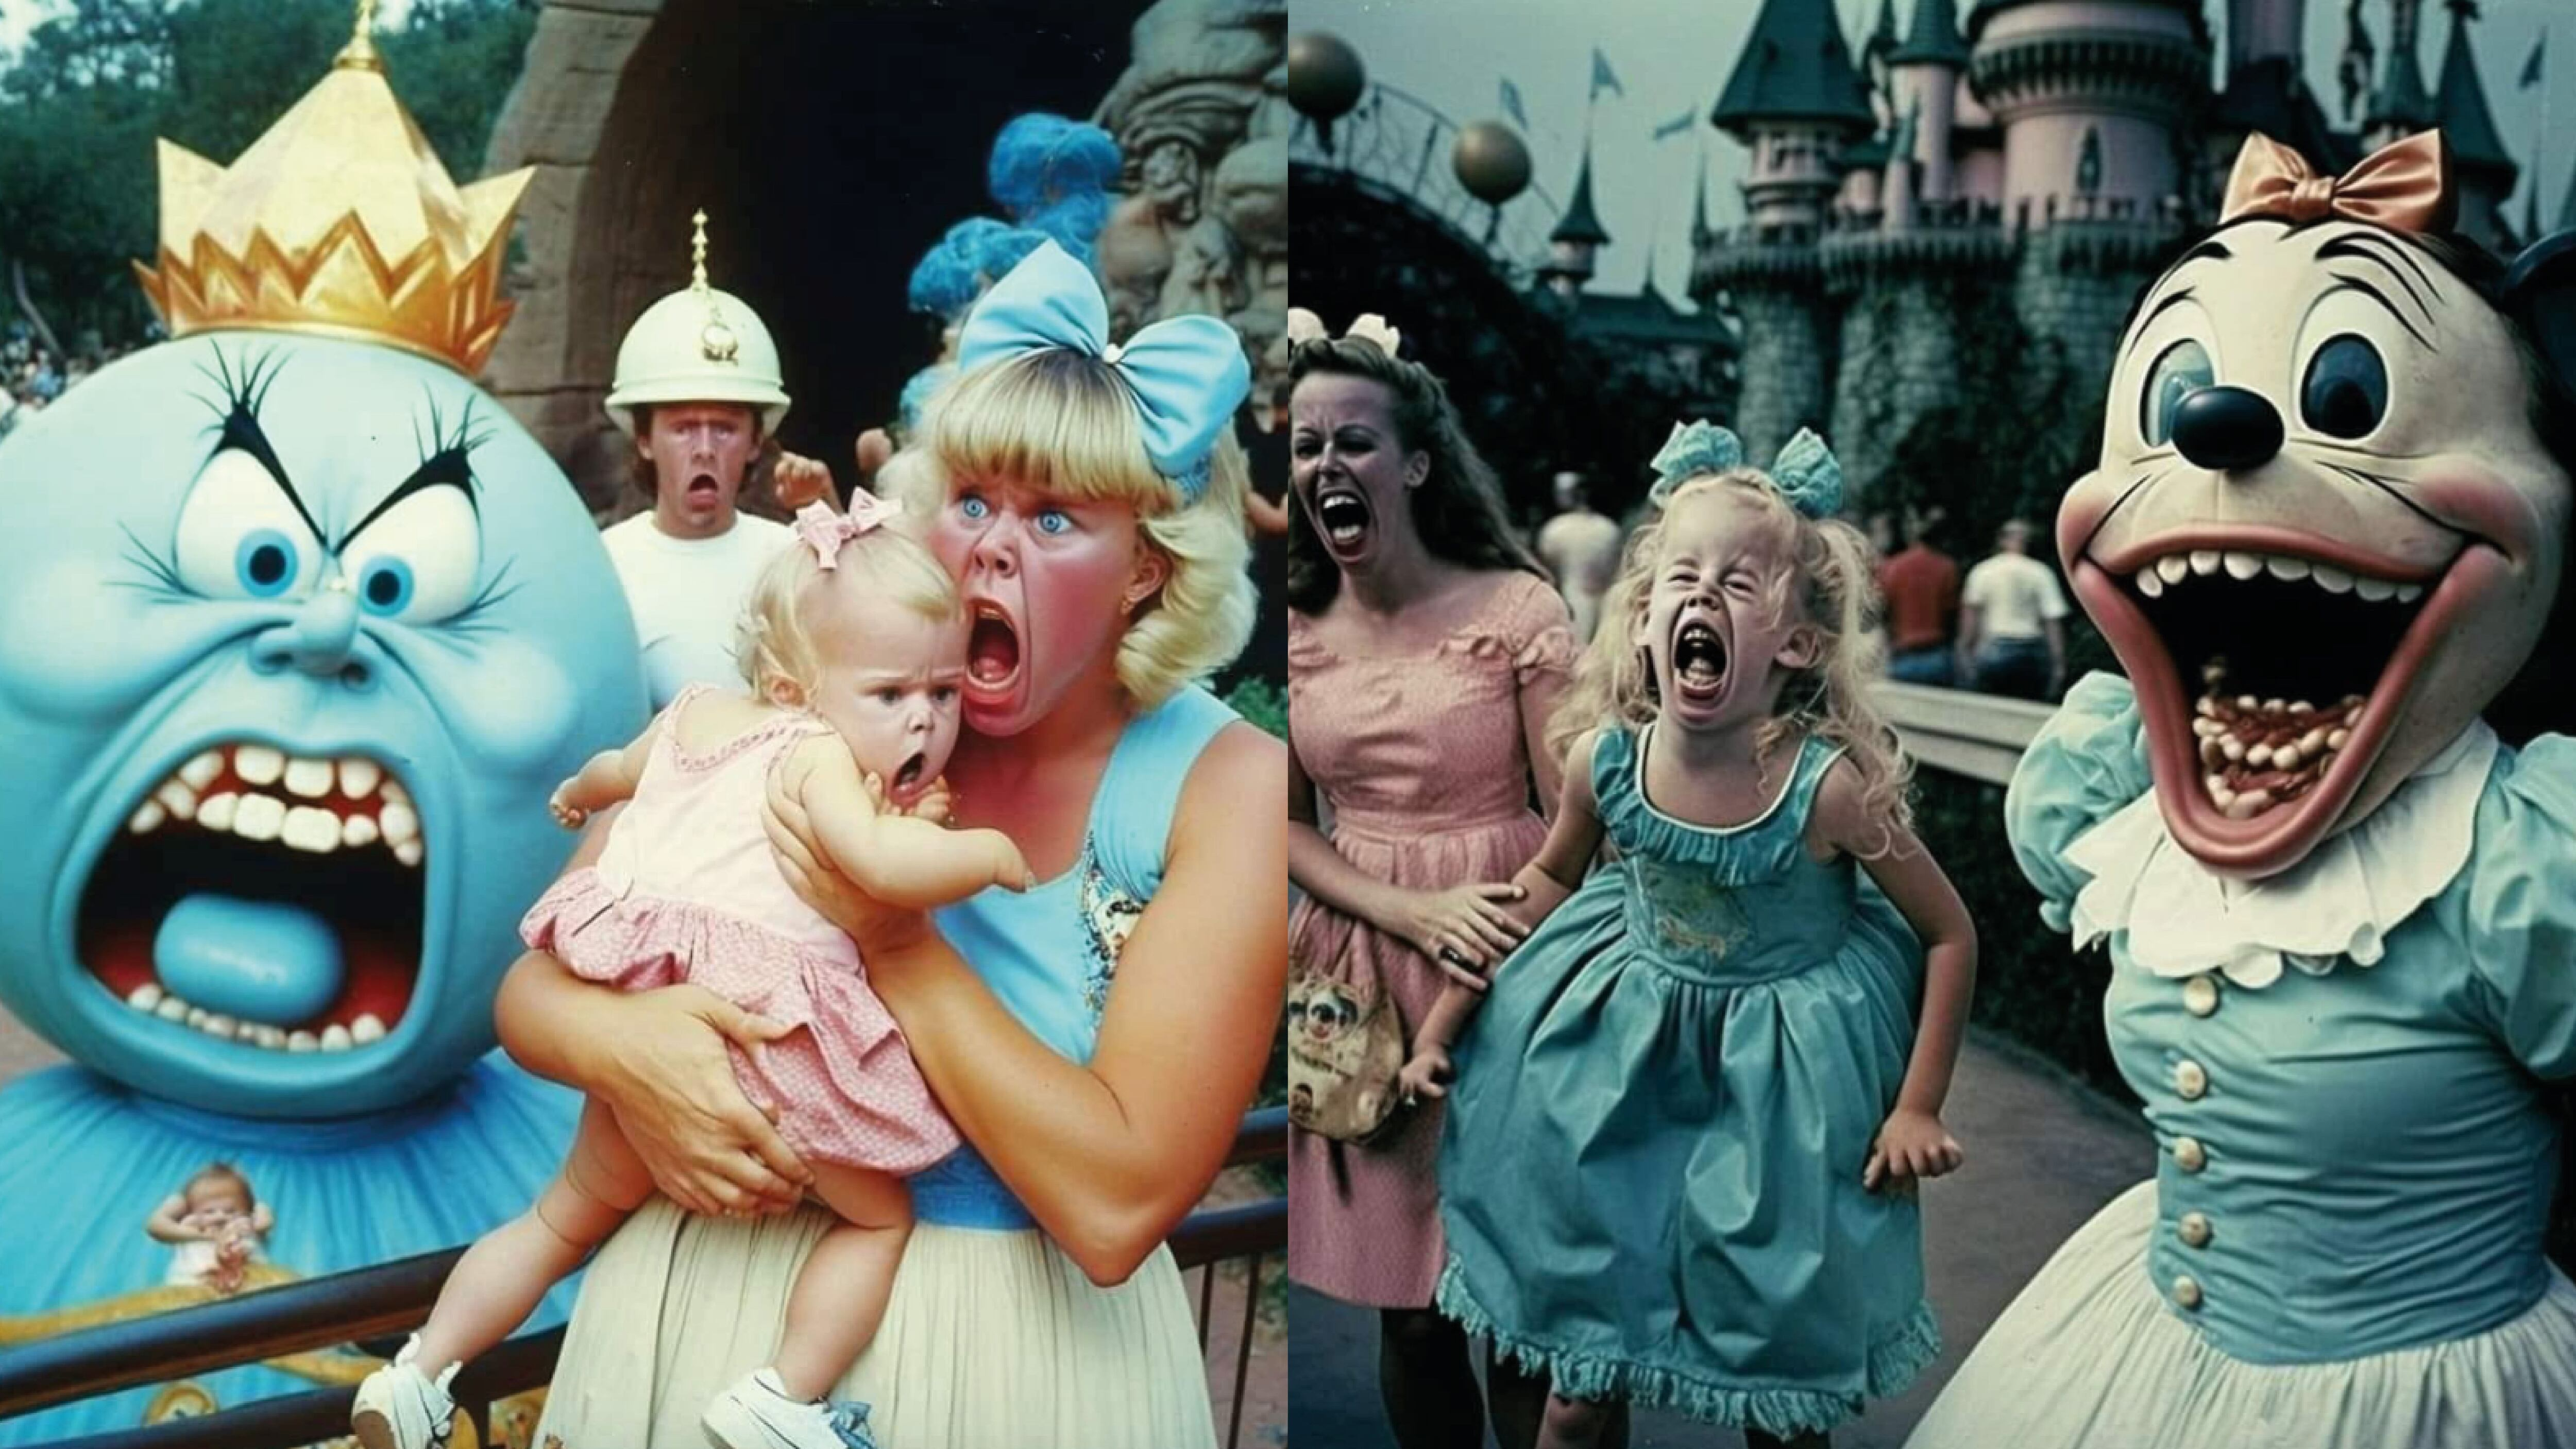

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTACIÓN DE DATOS

En esta ocasión no vamos a hacer webscraping sino que vamos a utilizar el siguiente dataset de kaggle: *Universal/Disney World Incident Data (2002-2022)*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [123]:
df = pd.read_csv('data.csv')

#REVISIÓN INICIAL DEL DATASET

Lo primero que vamos a hacer es echarle un vistazo al dataset

In [124]:
df.head()

,Company,Incident_date,Ride_name_dirty,Ride_name,Theme_Park,age_gender,description
0,Disney World,06/09/2022,Alien Swirling Saucers,Alien Swirling Saucers,Hollywood Studios,59 yof,guest with pre-existing condition sustained in...
1,Disney World,10/05/2014,Astro Orbiter,Astro Orbiter,Magic Kingdom,68 yom,"guest fell exiting vehicle, developed blood c..."
2,Disney World,12/03/2009,Astro Orbitor,Astro Orbiter,Magic Kingdom,40 yof,fractured left ankle exiting ride
3,Disney World,08/07/2022,Avatar Flight of Passage,Avatar Flight of Passage,Animal Kingdom,83 yom,guest with pre-existing condition was briefly ...
4,Disney World,4/19/22,Avatar Flight of Passage,Avatar Flight of Passage,Animal Kingdom,42 yof,guest with pre-existing condition had motion s...


In [125]:
df.sample(5)

,Company,Incident_date,Ride_name_dirty,Ride_name,Theme_Park,age_gender,description
500,Disney World,8/26/13,Space Mountain,Space Mountain,Magic Kingdom,26 yof,nausea vomiting & neck pain; reportedly underw...
111,Universal,3/13/21,E.T.Ã¢ÂÂs Adventure,E.T Adventure,Universal Studios,71 yof,motion sickness
135,Disney World,4/18/15,Expedition Everest,Expedition Everest,Animal Kingdom,46 yom,seizure after exiting.
577,Universal,6/14/20,Kala and Tai Nui Serpentine Body Slides,Tai Nui Serpentine Body Slide,Volcano Bay,9 yom,unresponsive
379,Disney World,03/07/2019,NaÃ¢ÂÂvi River Journey,Na'vi River Journey,Animal Kingdom,83 yom,injured hip entering the attraction


In [126]:
df.tail()

,Company,Incident_date,Ride_name_dirty,Ride_name,Theme_Park,age_gender,description
677,Disney World,7/21/19,Under the Sea Journey of the Little Mermaid,Under the Sea - Journey of the Little Mermaid,Magic Kingdom,69 yof,guest with pre-existing medical condition had ...
678,Disney World,06/02/2017,Under the Sea- Journey of the Little Mermaid,Under the Sea - Journey of the Little Mermaid,Magic Kingdom,34 yom,felt disoriented and fell after riding
679,Disney World,07/04/2016,Walt Disney World Railroad,Walt Disney World Railroad,Magic Kingdom,41 yom,guest felt ill and began shaking after exiting.
680,Disney World,05/05/2015,Walt Disney World Railroad,Walt Disney World Railroad,Magic Kingdom,71 yom,nausea and dizziness
681,Disney World,6/18/22,Wildlife Express,Wildlife Express,Animal Kingdom,42 yom,guest felt ill after experiencing the attraction


In [127]:
n_filas = df.shape[0]
n_columnas = df.shape[1]
print('El dataframe tiene', n_filas, 'filas y', n_columnas, 'columnas')

El dataframe tiene 682 filas y 7 columnas


Eliminamos la columna 'Ride_name_dirty', que presenta algunas erratas, conteniendo el nombre de las atracciones tal y como constaban en las fuentes originales. Pensamos que no aporta nada, ya que tenemos otro campo con los nombres corregidos.

In [128]:
df = df.drop('Ride_name_dirty', axis=1)

Vamos a ver qué valores tenemos en cada columna, por si hay que realizar alguna corrección.

In [129]:
#encontramos un valor en la columna 'Company' con un caracter erróneo
df['Company'].unique()

array(['Disney World', 'Universal', 'Universal:'], dtype=object)

In [130]:
df['Company'] = df['Company'].replace('Universal:', 'Universal')

In [131]:
#sobre esta columna realizaremos varias transformaciones en apartados posteriores, pero de momento la dejamos así, tal y como está
df['Incident_date'].unique()

array(['06/09/2022', '10/05/2014', '12/03/2009', '08/07/2022', '4/19/22',
       '07/05/2022', '1/27/22', '12/18/21', '12/21/21', '9/16/21',
       '6/29/21', '3/24/18', '07/05/2019', '5/28/18', '10/27/17',
       '04/11/2017', '12/06/2017', '6/24/17', '6/27/04', '05/08/2012',
       '12/19/04', '12/24/03', '3/14/08', '4/22/17', '10/05/2017',
       '09/02/2017', '12/02/2017', '06/12/2015', '02/12/2014', '7/21/14',
       '5/27/14', '01/11/2006', '11/30/04', '11/05/2003', '5/14/03',
       '09/08/2008', '3/18/19', '10/25/18', '10/06/2017', '02/09/2015',
       '11/10/2014', '01/03/2014', '07/11/2013', '9/14/10', '3/30/15',
       '8/25/10', '07/17/2007', '01/03/2017', '6/14/22', '11/22/17',
       '7/25/11', '12/29/01', '12/02/2012', '05/07/2012', '7/24/13',
       '9/22/19', '08/04/2017', '10/10/2013', '7/16/11', '6/26/10',
       '02/16/04', '5/19/15', '12/07/2004', '01/01/2008', '02/05/2007',
       '05/25/2012', '4/23/15', '12/13/19', '3/17/18', '10/13/15',
       '6/24/03', '4/30/

In [132]:
#vemos las atracciones que componen el dataset
df['Ride_name'].unique()

array(['Alien Swirling Saucers', 'Astro Orbiter',
       'Avatar Flight of Passage', 'Back to the Future',
       'Big Thunder Mountain Railroad',
       'Buzz Lightyears Space Ranger Spin', 'Camp Jurassic',
       'Caro-Seuss-el', 'Carousel of Progress', 'Castaway Creek',
       'Chair Lift', 'Cross County Creek', "Crush n' Gusher",
       'Despicable Me Minion Mayhem', 'Dinosaur', 'Disaster',
       'Downhill Double Dipper', "Dr Doom's Fearfall", 'Dragon Challenge',
       'Dudley Do Rights Ripsaw Falls', 'Dumbo', 'E.T Adventure',
       "Ellen's Energy Adventure", 'Expedition Everest',
       'Fast & Furious - Supercharged', "Fievel's Playground",
       'Flight of the Hippogriff', 'Frozen Ever After',
       'Gran Fiesta Tour Attraction', 'Great Movie Ride',
       "Hagrid's Magical Creatures Motorbike Adventure",
       'Halloween Horror Nights',
       'Harry Potter and the Escape from Gringotts',
       'Harry Potter and the Forbidden Journey', 'Haunted Mansion',
       'Hollywo

In [133]:
#también los distintos parques temáticos
df['Theme_Park'].unique()

array(['Hollywood Studios', 'Magic Kingdom', 'Animal Kingdom',
       'Universal Studios', 'Islands of Adventure', 'Blizzard Beach',
       'Epcot', 'Typhoon Lagoon', 'Volcano Bay'], dtype=object)

In [134]:
#vemos la columna age_gender, que va a requerir de varias transformaciones posteriormente
df['age_gender'].unique()

array(['59 yof', '68 yom', '40 yof', '83 yom', '42 yof', '67 yof',
       '25 yof', '69 yom', '69 yof', '68 yof', '27 yom', '41 yom',
       '34 yof', '18 yom', '77 yof', '56 yof', '79 yof', '31 yof',
       '62 yof', '23 yom', '39 yom', '44 yof', '54 yom', '75 yom',
       '63 yof', '71 yof', '72 yof', '56 yom', '58 yof', '75 yof',
       '12 yof', '50 yof', '67 yom', '48 yom', '73 yof', '5 yof',
       '14 yof', '33 yof', '59 yom', '80 yom', '52 yof', '1 yof',
       '57 yof', '18 yof', '54 yof', '41 yof', '65 yof', '33yof',
       '17 yom', '45 yof', '7 yof', '66 yof', '30 yom', '64 yof',
       '65 yom', '53 yom', '46 yof', '58 yom', '24 yom', '36 yof',
       '45 yom', '61yof', '73 yom', '61 yof', '8 yof', '52 yom', '9 yof',
       '47 yof', '17 yof', '29 yof', '46 yom', '16 yom', '49 yof',
       '55 yof', '62 yom', '40Ã¢Â\x80Â\x99s yom', '11 yom', '21 yof',
       '61 yom', '13 yom', '88 yof', '76 yom', '77 yom', '81 yof',
       '57 yom', '60 yom', '74 yom', '70 yom', '26 yom',

In [135]:
#y también los valores únicos de la columna description
df['description'].unique()

array(['guest with pre-existing condition sustained injury to toes',
       ' guest fell exiting vehicle, developed blood clot in leg',
       'fractured left ankle exiting ride',
       'guest with pre-existing condition was briefly unresponsive while experiencing attraction',
       'guest with pre-existing condition had motion sickness after experiencing the attraction',
       'guest with pre-existing lost consciousness after exiting the attraction',
       'guest with a pre-existing condition had a seizure after experiencing the attraction',
       'guest felt unwell upon exiting attraction',
       'guest felt disoriented after experiencing attraction',
       'guest with pre-existing condition felt lightheaded after experiencing the attraction',
       'guest with pre-existing condition had a seizure after experiencing the attraction',
       'guest with pre-existing condition felt ill after riding attraction',
       'guest temporarily lost consciousness while on attraction',
 

Queremos también saber qué tipo de datos contienen las diferentes columnas.

In [136]:
df.dtypes

Company          object
Incident_date    object
Ride_name        object
Theme_Park       object
age_gender       object
description      object
dtype: object

#TRANSFORMACIÓN DE DATOS

Hay varios aspectos del dataframe que vamos a cambiar.

Lo primero que vamos a hacer es cambiar la columna 'Incident_date' a tipo datetime

In [137]:
#incluimos el parámetro format=mixed ya que hemos observado que hay varios formatos en la fecha, así que le pedimos a pandas que detecte automáticamente dicho formato y le da una uniformidad
#también incluimos errors=coerce para que convierta las fechas inválidas, de haberlas, en 'NaT' (Not a Time), lo cual ayudará a identificarlas
df['Incident_date'] = pd.to_datetime(df['Incident_date'], format='mixed', dayfirst=True, errors='coerce')

In [157]:
#ahora comprobamos si hay algún valor NaT; vemos que no
df['Incident_date'].isnull().sum()

0

In [139]:
#también comprobamos si se ha efectuado el cambio de tipo de dato
df.dtypes

Company                  object
Incident_date    datetime64[ns]
Ride_name                object
Theme_Park               object
age_gender               object
description              object
dtype: object

In [140]:
#también vamos a crear una nueva columna con el año, que nos servirá para posteriores análisis
df['Year'] = df['Incident_date'].dt.year

En la columna 'age_gender' también queremos realizar algunas modificaciones. Tal y como está ahora, dicha columna contiene la edad de los visitantes accidentados y el género. Preferimos dividir tales datos en dos columnas, pensamos que será mejor para los análisis ulteriores.

In [141]:
#creamos una nueva columna que contendrá solo la edad. Para ello extraemos solo los números
df['Age'] = df['age_gender'].str.extract('(\d+)')

In [142]:
#hacemos la comprobación de cómo han quedado los valores únicos del campo 'Age'
df['Age'].unique()

array(['59', '68', '40', '83', '42', '67', '25', '69', '27', '41', '34',
       '18', '77', '56', '79', '31', '62', '23', '39', '44', '54', '75',
       '63', '71', '72', '58', '12', '50', '48', '73', '5', '14', '33',
       '80', '52', '1', '57', '65', '17', '45', '7', '66', '30', '64',
       '53', '46', '24', '36', '61', '8', '9', '47', '29', '16', '49',
       '55', '11', '21', '13', '88', '76', '81', '60', '74', '70', '26',
       '22', '51', '78', '38', '3', '43', '19', '28', '89', '35', '10',
       '4', '82', '86', '20', '15', '6', '37', '32', '87'], dtype=object)

In [143]:
#vamos a crear ahora una columna para el campo 'Gender' que contendrá el género. En esta ocasión extraemos únicamente las letras
df['Gender'] = df['age_gender'].str.extract('([a-zA-Z]+)')

In [144]:
#veamos qué valores tenemos en la columna
df['Gender'].unique()

array(['yof', 'yom', 's'], dtype=object)

In [145]:
#queremos ver el registro que contiene 's' en la columna 'Gender', por si encontramos alguna pista acerca del género
registro_s = df[df['Gender'] == 's']
registro_s
#efectivamente, vemos en el campo age_gender que se trata de un visitante de género masculino

,Company,Incident_date,Ride_name,Theme_Park,age_gender,description,Year,Age,Gender
106,Disney World,2006-02-22,Dumbo,Magic Kingdom,40Ã¢ÂÂs yom,Came off ride not feeling well.,2006,40,s


In [146]:
#ahora ya podemos hacer los reemplazos pertinentes para que los valores de la columna queden como queremos
df['Gender'] = df['Gender'].replace('yof', 'Female').replace('yom', 'Male').replace('s', 'Male')

In [147]:
#comprobamos que ahora sí tenemos los valores en la columna como deseamos
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [148]:
#la columna age_gender ya no nos sirve de nada, así que la eliminamos
df.drop('age_gender', axis=1, inplace=True)

La última columna que queremos modificar es la de 'description'. En este campo aparece una descripción del incidente; al parecer, algunos visitantes terminaron muriendo a causa de aquel. Vamos a crear una nueva columna que indique si el visitante murió o no.

In [149]:
#creamos una función que detecta si aparecen ciertas palabras que denotan el fallecimiento del visitante
def check_passed_away(description):
    description_lower = description.lower()
    if 'passed away' in description_lower or 'died' in description_lower:
        return 'Yes'
    else:
        return 'No'

In [150]:
#creamos la nueva columna
df['Passed_away'] = df['description'].apply(check_passed_away)

In [151]:
#comprobamos que tenemos los valores correctamente
df['Passed_away'].unique()

array(['No', 'Yes'], dtype=object)

Vamos a crear otra columna que indique si el visitante accidentado tenía una condicion médica previa o no.

In [152]:
def check_pre_existing_condition(description):
    description_lower = description.lower()
    if 'condition' in description_lower or 'history' in description_lower:
        return 'Yes'
    else:
        return 'No'

In [153]:
df['Pre_existing_condition'] = df['description'].apply(check_pre_existing_condition)

In [154]:
df['Pre_existing_condition'].unique()

array(['Yes', 'No'], dtype=object)

In [155]:
#vamos también a cambiar el nombre de la columna 'description', para que empiece por mayúscula, como el resto
df = df.rename(columns={'description': 'Description'})

In [156]:
#por último vemos cómo se ha quedado el dataframe después de todas las modificaciones que le hemos aplicado
df

,Company,Incident_date,Ride_name,Theme_Park,Description,Year,Age,Gender,Passed_away,Pre_existing_condition
0,Disney World,2022-09-06,Alien Swirling Saucers,Hollywood Studios,guest with pre-existing condition sustained in...,2022,59,Female,No,Yes
1,Disney World,2014-05-10,Astro Orbiter,Magic Kingdom,"guest fell exiting vehicle, developed blood c...",2014,68,Male,No,No
2,Disney World,2009-03-12,Astro Orbiter,Magic Kingdom,fractured left ankle exiting ride,2009,40,Female,No,No
3,Disney World,2022-07-08,Avatar Flight of Passage,Animal Kingdom,guest with pre-existing condition was briefly ...,2022,83,Male,No,Yes
4,Disney World,2022-04-19,Avatar Flight of Passage,Animal Kingdom,guest with pre-existing condition had motion s...,2022,42,Female,No,Yes
...,...,...,...,...,...,...,...,...,...,...
677,Disney World,2019-07-21,Under the Sea - Journey of the Little Mermaid,Magic Kingdom,guest with pre-existing medical condition had ...,2019,69,Female,No,Yes
678,Disney World,2017-02-06,Under the Sea - Journey of the Little Mermaid,Magic Kingdom,felt disoriented and fell after riding,2017,34,Male,No,No
679,Disney World,2016-04-07,Walt Disney World Railroad,Magic Kingdom,guest felt ill and began shaking after exiting.,2016,41,Male,No,No
680,Disney World,2015-05-05,Walt Disney World Railroad,Magic Kingdom,nausea and dizziness,2015,71,Male,No,No


#ANÁLISIS DE DATOS

##ANÁLISIS EXPLORATORIO

Vamos a empezar con un análisis exploratorio para comprender mejor la estructura y las características de los datos.







En primer lugar vamos a explicar qué significa cada campo del dataframe.

| Variable  | Definicion |
|-----------|-----------|
| Company | Complejo de ocio que incluye parques de atracciones, hoteles y otras instalaciones recreativas
| Incident_date | Fecha del incidente
| Ride_name| Nombre de la atracción donde sucedió el incidente
| Theme_Park| Parque temática donde sucedió el incidente
| Description | Breve descripción del incidente
| Age | Edad del visitante que sufrió el incidente
| Gender | Género del visitante que sufrío el incidente
| Passed_away | Indica si el visitante falleció a causa del incidente, o no
| Pre_existing_condition | Indica si el visitante tenía una condición médica preexistente
| Year | Año en el que se produjo el incidente

In [37]:
#con el método info obtenemos información útil. Por ejemplo, comprobamos que no hay nulos. Se trata supuestamente de un dataset limpio pero no está de más verificarlo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Company                 682 non-null    object        
 1   Incident_date           682 non-null    datetime64[ns]
 2   Ride_name               682 non-null    object        
 3   Theme_Park              682 non-null    object        
 4   Description             682 non-null    object        
 5   Year                    682 non-null    int32         
 6   Age                     682 non-null    object        
 7   Gender                  682 non-null    object        
 8   Passed_away             682 non-null    object        
 9   Pre_existing_condition  682 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 50.7+ KB


In [38]:
#cambiamos el tipo de dato de la columna 'Age' a número entero. Lo hacemos con el método astype, ya que sabemos que no hay nulos en dicha columna
df['Age'] = df['Age'].astype(int)

In [39]:
#ya lo tenemos como queremos
df.dtypes

Company                           object
Incident_date             datetime64[ns]
Ride_name                         object
Theme_Park                        object
Description                       object
Year                               int32
Age                                int64
Gender                            object
Passed_away                       object
Pre_existing_condition            object
dtype: object

Vamos a hacer un conteo con cada uno de los valores que tenemos en las distintas columnas.

In [40]:
#empezamos por la columna 'Company'
df['Company'].value_counts()

Company
Disney World    502
Universal       180
Name: count, dtype: int64

In [41]:
#ahora lo vemos en porcentaje
df['Company'].value_counts(normalize=True)

Company
Disney World    0.73607
Universal       0.26393
Name: proportion, dtype: float64

In [167]:
#vamos a hacer un gráfico de esta columna
df_company = df['Company'].value_counts().reset_index()

colores_1 = ['#1E90FF', '#0033A0']
fig_orden = px.pie(df_company, values='count', names='Company', title='Accidents in Resort Complexes', hole=0.5, color_discrete_sequence = colores_1)
fig_orden.update_layout(title_x=0.5, width=800, height=600)
fig_orden.show()

Vemos cómo más del 70% de los incidentes de nuestros registros pertecen a los parques de Disney. Esto no significa necesariamente que Disney World sea más peligroso y propenso a los accidentes. Hay que tener en cuenta que este parque recibe bastante más visitantes que los Universal Studios. Las cifran varían según el año, pero el parque de Mickey Mouse recibe alrededor de 58 millones de visitantes anualmente, mientras que los Universal Studios reciben 'solo' unos 20 de millones.

Vamos ahora con la columna de la fecha del incidente.

In [43]:
#tenemos 648 fechas, y 682 registros, lo cual indica que ha habido días en los que han sucedido varios incidentes
n_fechas = df['Incident_date'].nunique()
print('número de fechas:', n_fechas)
print('número de filas:', n_filas)

número de fechas: 648
número de filas: 682


In [44]:
#vamos a ver qué días son aquellos en los que ha habido varios incidentes. Primero hacemos un conteo de cada día y sus registros
incidentes_diarios = df.groupby(df['Incident_date']).size().reset_index(name='conteo')
incidentes_diarios

,Incident_date,conteo
0,2001-12-29,1
1,2002-03-22,1
2,2002-03-29,1
3,2002-04-01,1
4,2002-07-07,1
...,...,...
643,2022-08-31,1
644,2022-09-06,1
645,2022-09-09,1
646,2022-09-23,1


In [45]:
#luego ordenamos el df para ver cuáles han sido los días con más registros
incidentes_diarios_ordenados = incidentes_diarios.sort_values('conteo', ascending=False).reset_index(drop=True)
incidentes_diarios_ordenados

,Incident_date,conteo
0,2022-09-25,2
1,2014-01-06,2
2,2013-07-24,2
3,2013-03-18,2
4,2015-06-24,2
...,...,...
643,2011-10-25,1
644,2011-10-31,1
645,2011-11-19,1
646,2011-11-20,1


Parece ser que como máximo, en un mismo día, solo se registraron dos incidentes. Tenemos concretamente 34 de estas jornadas con incidentes dobles.

In [46]:
fecha_mas_antigua = df['Incident_date'].min().date()
print("La fecha más antigua en los registros es el", fecha_mas_antigua)

La fecha más antigua en los registros es el 2001-12-29


In [47]:
fecha_mas_reciente = df['Incident_date'].max().date()
print("La fecha más reciente en los registros es el", fecha_mas_reciente)

La fecha más reciente en los registros es el 2022-09-25


Ahora vamos a ver cuantos incidentes en los parques ha habido cada año.

In [48]:
df_incidentes_año = df.groupby('Year').size().reset_index(name='Accidents')
df_incidentes_año

,Year,Accidents
0,2001,1
1,2002,8
2,2003,16
3,2004,18
4,2005,19
5,2006,28
6,2007,20
7,2008,36
8,2009,33
9,2010,27


In [166]:
#realizamos un gráfico de lineas que muestre el recuento de accidentes a través de los años
fig = px.line(df_incidentes_año, x = 'Year', y = 'Accidents', title = "Incident count per year")
fig.update_layout(title_x=0.5)
fig.show()

In [50]:
media_anual = round(df.shape[0] / (len(df['Year'].unique()) - 1), 2)
print('Cada año tenemos en los registros de media', media_anual, 'accidentes')

Cada año tenemos en los registros de media 32.48 accidentes


Ahora vamos con las atracciones.

In [51]:
n_atracciones = df['Ride_name'].nunique()
print('El dataset contiene registros de incidentes en', n_atracciones, 'atracciones')

El dataset contiene registros de incidentes en 112 atracciones


In [52]:
#hacemos un recuento de cuántos incidentes ha habido en cada atracción
df_atracciones = df['Ride_name'].value_counts().reset_index()
df_atracciones

,Ride_name,count
0,Harry Potter and the Forbidden Journey,44
1,Space Mountain,39
2,Expedition Everest,38
3,Mission: Space,36
4,Rock 'n' Roller Coaster Starring Aerosmith,23
...,...,...
107,Punga Racers,1
108,Remy' s Ratatouille Adventure,1
109,Runamukka Reef,1
110,Slush Gusher,1


In [53]:
#hacemos una selección de las diez atracciones donde han sucedido más incidentes
atracciones_top_10 = df_atracciones.head(10)
atracciones_top_10

,Ride_name,count
0,Harry Potter and the Forbidden Journey,44
1,Space Mountain,39
2,Expedition Everest,38
3,Mission: Space,36
4,Rock 'n' Roller Coaster Starring Aerosmith,23
5,Kilimanjaro Safaris Expedition,21
6,Revenge of the Mummy,17
7,The Twilight Zone Tower of Terror,16
8,Surf Pool,16
9,Star Tours: The Adventure Continues,16


No tenemos información para valorar si la mayor frecuencia de incidentes en estas atracciones se debe a una mayor peligrosidad de estas o al hecho de que estas atracciones reciben más visitantes.

Es el turno de los parques temáticos.

In [54]:
n_parques = df['Theme_Park'].nunique()
print('El dataset contiene registros de incidentes en', n_parques, 'parques temáticos')

El dataset contiene registros de incidentes en 9 parques temáticos


In [55]:
df['Theme_Park'].value_counts()

Theme_Park
Magic Kingdom           177
Animal Kingdom           97
Islands of Adventure     95
Epcot                    91
Hollywood Studios        80
Universal Studios        68
Typhoon Lagoon           32
Blizzard Beach           26
Volcano Bay              16
Name: count, dtype: int64

In [56]:
#ahora lo vemos en porcentajes
df['Theme_Park'].value_counts(normalize=True).round(2)

Theme_Park
Magic Kingdom           0.26
Animal Kingdom          0.14
Islands of Adventure    0.14
Epcot                   0.13
Hollywood Studios       0.12
Universal Studios       0.10
Typhoon Lagoon          0.05
Blizzard Beach          0.04
Volcano Bay             0.02
Name: proportion, dtype: float64

Vemos que Magic Kingdom destaca notablemente sobre el resto de parques, con aproximadamente un 25% de los registros. Pero al igual que sucedía con las atracciones, en el caso de los parques temáticos no podemos saber si corresponde un mayor número de incidentes con una más elevada afluencia de visitantes.

Pensamos que podría ser interesante elaborar un gráfico que recopilase los datos que tenemos de las columnas 'Company', 'Theme_Park', y 'Ride_name'. Dado que existe una relación jerárquica entre estos campos (es decir, cada atracción pertenece a un parque temático, que a su vez está dentro de un complejo de ocio determinado) creemos que el gráfico tipo Sunburst sería la elección idónea para representar lo que deseamos.

In [158]:
df_recopilatorio = df.groupby(['Company', 'Theme_Park', 'Ride_name']).size().reset_index(name='Count')

In [164]:
fig = px.sunburst(df_recopilatorio, path=['Company', 'Theme_Park', 'Ride_name'], values='Count', title='Theme park accidents')
fig.update_layout(title='Theme park accidents', width=1200, height=1000, title_x=0.5)
fig.show()

Este gráfico proporciona una visión clara y rápida de la cantidad de accidentes en diferentes niveles: desde cada atracción específica, pasando por cada parque temático, hasta el complejo de ocio al que pertenece. Así, se puede ver de un vistazo cuántos accidentes han ocurrido en cada atracción, en cada parque de atracciones y en cada complejo de ocio.

Vamos con la columna de la edad de los visitantes.

In [57]:
n_edades = df['Age'].nunique()
print('Tenemos visitantes con', n_edades, 'edades distintas')

Tenemos visitantes con 86 edades distintas


In [58]:
edad_max = df['Age'].max()
print('El visitante de nuestros registros con una mayor edad tenía', edad_max, 'años')

El visitante de nuestros registros con una mayor edad tenía 89 años


In [59]:
edad_min = df['Age'].min()
print('El visitante de nuestros registros con una menor edad tenía', edad_min, 'año')

El visitante de nuestros registros con una menor edad tenía 1 año


In [60]:
#vamos a hacer un nuevo df que muestre el número de incidentes por edad
df_edades = df['Age'].value_counts().reset_index()
df_edades

,Age,count
0,57,23
1,68,23
2,59,18
3,70,18
4,69,18
...,...,...
81,15,2
82,88,1
83,86,1
84,13,1


In [61]:
#ahora queremos lo mismo, pero ordenado no por el conteo de incidentes, sino por la edad
df_edades_ordenado = df_edades.sort_values('Age', ascending=True).reset_index(drop=True)
df_edades_ordenado

,Age,count
0,1,2
1,3,2
2,4,3
3,5,2
4,6,2
...,...,...
81,83,4
82,86,1
83,87,1
84,88,1


In [162]:
fig = px.bar(df_edades_ordenado, x = 'Age', y = 'count', title = "Incident count by age", labels = {'Age': 'Age', 'count':'Count'}, color='count', color_continuous_scale='viridis')
fig.update_layout(title_x=0.5)
fig.show()

De estos análisis destacamos varios aspectos:

-Contamos con un rango amplísimo de edades. Son 86 años distintos, con lo que prácticamente todo el espectro de la vida humana está representado, desde el primer año de vida hasta los 89.

-Vemos que las edades más propensas a sufrir incidentes en los parques se sitúan, por lo general, en un intervalo que va desde los 55 hasta los 70 años.

-Pese a que se trata en general de un colectivo vulnerable, no hay muchos registros de accidentes con visitantes de edades muy elevadas, de más de 80 años y sobretodo de más de 85 años. Es esperable que los parques no reciban por lo general visitantes con una edad tan avanzada.

Ahora vamos con la columna 'Gender'.

In [63]:
df['Gender'].value_counts()

Gender
Female    365
Male      317
Name: count, dtype: int64

In [64]:
df['Gender'].value_counts(normalize=True).round(2)

Gender
Female    0.54
Male      0.46
Name: proportion, dtype: float64

Vemos cómo la proporción entre hombres y mujeres está bastante igualada, abundando un poco más los registros femeninos.

Es el turno del campo 'Passed_away', donde consta si el incidente tuvo consecuencias mortales o no.

In [65]:
df['Passed_away'].value_counts()

Passed_away
No     657
Yes     25
Name: count, dtype: int64

In [66]:
df['Passed_away'].value_counts(normalize=True).round(2)

Passed_away
No     0.96
Yes    0.04
Name: proportion, dtype: float64

La proporción de incidentes que terminaron en muerte no alcanza el 5%, lo cual representa cifras bastante bajas. Teniendo en cuenta que tenemos registros de 21 años y 25 casos de fallecimientos, cada año aproximadamente habría un accidente con consecuencias mortales.

No obstante, no nos contentamos con este cálculo aproximado. Queremos conocer cada año, cuantos fallecimientos se produjeron.

In [67]:
df_muertes_anuales = df[df['Passed_away'] == 'Yes'].groupby('Year').size().reset_index(name='Deceased')
df_muertes_anuales

,Year,Deceased
0,2003,2
1,2004,2
2,2005,4
3,2006,4
4,2007,3
5,2010,1
6,2012,2
7,2014,2
8,2015,1
9,2016,1


Vemos cómo la tendencia de muertes en los parques de DisneyWorld y Universal Studios es a la baja. El pico de fallecimientos de produjo en los años 2005 y 2006, con cuatro fallecidos cada año. A partir de este punto, se aprecia un descenso gradual en el número de fallecidos a causa de los incidentes, que no corresponde con la tendencia del número de incidentes, la cual, exceptuando por el impacto de la pandemia, se mantiene estable.

Así pues, no parece que exista una relación entre los incidentes y los fallecimientos. No obstante, aunque estas conclusiones las hemos obtenido de nuestras observaciones, queremos tener una confirmación más fiable. Por ello vamos a hacer una correlación entre la cantidad de incidentes  y muertos.

In [68]:
#hago un merge entre los dos datraframes ya creados, el de conteo de incidentes y el conteo de muertos
df_incidentes_muertes = pd.merge(df_incidentes_año, df_muertes_anuales, on='Year', how='outer')

In [69]:
#antes de hacer la correlación, quiero sustituir por 0 los valores nulos
df_incidentes_muertes.fillna(0, inplace=True)
df_incidentes_muertes

,Year,Accidents,Deceased
0,2001,1,0.0
1,2002,8,0.0
2,2003,16,2.0
3,2004,18,2.0
4,2005,19,4.0
5,2006,28,4.0
6,2007,20,3.0
7,2008,36,0.0
8,2009,33,0.0
9,2010,27,1.0


In [70]:
#comprobamos que no existe ninguna relación entre las dos variables, tal y como suponíamos
df_incidentes_muertes[['Accidents', 'Deceased']].corr()

,Accidents,Deceased
Accidents,1.000000,-0.057074
Deceased,-0.057074,1.000000


Para terminar con esta sección veamos la columna 'Pre_existing_condition'.

In [71]:
df['Pre_existing_condition'].value_counts()

Pre_existing_condition
No     537
Yes    145
Name: count, dtype: int64

In [72]:
df['Pre_existing_condition'].value_counts(normalize=True)

Pre_existing_condition
No     0.78739
Yes    0.21261
Name: proportion, dtype: float64

Más del 20% de los incidentes ocurrieron con visitantes que tenían alguna condición médica previa. Aunque este porcentaje no es demasiado alto, sí sugiere que existe una cierta relación entre tener una condición médica previa y la probabilidad de experimentar un incidente.

##PLANTEAMIENTO DE HIPÓTESIS

En esta sección, nos vamos a enfocar en formular y probar varias hipótesis basadas en los hallazgos preliminares obtenidos durante el Análisis Exploratorio de Datos.

###H1: Las atracciones en las que se producen más muertes coinciden con aquellas en las que hay más accidentes

Nuestra primera hipótesis considera que las atracciones más peligrosas en cuanto a número de incidentes son aquellas también que devienen en un mayor número de fallecidos.

In [73]:
#anteriormente ya habíamos obtenido las atracciones con más accidentes
atracciones_top_10

,Ride_name,count
0,Harry Potter and the Forbidden Journey,44
1,Space Mountain,39
2,Expedition Everest,38
3,Mission: Space,36
4,Rock 'n' Roller Coaster Starring Aerosmith,23
5,Kilimanjaro Safaris Expedition,21
6,Revenge of the Mummy,17
7,The Twilight Zone Tower of Terror,16
8,Surf Pool,16
9,Star Tours: The Adventure Continues,16


In [74]:
#hacemos un nuevo df con las atracciones en las que hubo fallecidos, y el conteo de fallecidos de cada una. Luego, lo ordenamos de manera descendente
df_atracciones_mortalidad = df[df['Passed_away'] == 'Yes'].groupby('Ride_name').size().reset_index(name='Deceased')
df_atracciones_mortalidad_ordenada = df_atracciones_mortalidad.sort_values('Deceased', ascending=False).reset_index(drop=True)
df_atracciones_mortalidad_ordenada

,Ride_name,Deceased
0,Space Mountain,4
1,Surf Pool,3
2,Mission: Space,2
3,Big Thunder Mountain Railroad,1
4,Prince Charming Regal Carousel,1
5,Star Tours: The Adventure Continues,1
6,Spaceship Earth,1
7,Soarin' Around the World,1
8,Rock 'n' Roller Coaster Starring Aerosmith,1
9,Revenge of the Mummy,1


Podríamos decir que esta hipótesis se confirma, no de manera rotunda, pero sí que encontramos suficientes coincidencias. Es cierto que en la atracción donde más incidentes suceden, 'Harry Potter and the Forbidden Journey', no hubo muertes derivadas. No obstante, las tres atracciones con más mortalidad, 'Space Mountain', 'Surf Pool', y 'Mission: Space', se hallan entre las diez atracciones con más accidentes. De hecho, 'Space Mountain', la atracción más "mortal", es también la segunda atracción en accidentes.

Por lo demás, señalar que hay algunas atracciones con fallecimientos, concretamente 'Star Tours: The Adventure Continues', Rock 'n' Roller Coaster Starring Aerosmith', 'Revenge of the Mummy', y 'Expedition Everest', que a su vez se encuentran en el top 10 de las atracciones con más incidentes.

###H2: La mayoría de los visitantes que han muerto tenían una edad avanzada

Esta hipótesis sostiene que las muertes a causa de los incidentes producidos en los parques se han producido sobretodo en visitantes que excedían los 75 años. Es decir, creemos que la edad podría ser un factor importante a la hora de determinar si el incidente terminó en fallecimiento.

In [75]:
#creamos un nuevo df solo con aquellos visitantes que terminaron falleciendo
df_fallecidos = df[df['Passed_away'] == 'Yes'].copy()
df_fallecidos

,Company,Incident_date,Ride_name,Theme_Park,Description,Year,Age,Gender,Passed_away,Pre_existing_condition
25,Disney World,2017-02-09,Big Thunder Mountain Railroad,Magic Kingdom,guest with pre-existing condition collapsed; l...,2017,54,Male,Yes,Yes
71,Disney World,2005-04-30,Dinosaur,Animal Kingdom,"guest lost consciousness, parents indicated h...",2005,30,Male,Yes,Yes
86,Disney World,2007-03-16,Downhill Double Dipper,Blizzard Beach,It is unclear whether the guest rode this attr...,2007,52,Male,Yes,No
120,Disney World,2003-03-28,Ellen's Energy Adventure,Epcot,heart attack later died.,2003,81,Female,Yes,No
155,Disney World,2007-12-18,Expedition Everest,Animal Kingdom,Guest with history of heart condition was unco...,2007,44,Male,Yes,Yes
262,Disney World,2014-12-25,It's A Small World,Magic Kingdom,guest with preexisting health condition lost c...,2014,22,Female,Yes,Yes
272,Disney World,2012-03-23,Jungle Cruise,Magic Kingdom,fell while stepping into boat & fractured fibu...,2012,40,Female,Yes,No
330,Disney World,2018-06-10,Meltaway Bay,Blizzard Beach,guest with pre-existing heart condition had a ...,2018,70,Male,Yes,Yes
346,Disney World,2006-04-11,Mission: Space,Epcot,Felt ill; passed away next day at hospital.,2006,49,Female,Yes,No
349,Disney World,2005-06-13,Mission: Space,Epcot,child lost consciousness. Later died at hospital,2005,4,Male,Yes,No


In [76]:
media_fallecidos = df_fallecidos['Age'].mean().astype(int)
print('La media de los fallecidos a causa de los incidentes en los parques es de', media_fallecidos)

La media de los fallecidos a causa de los incidentes en los parques es de 45


In [77]:
#hacemos el conteo de edades y número de fallecimientos
df_edad_fallecidos = df_fallecidos['Age'].value_counts().reset_index()
df_edad_fallecidos

,Age,count
0,54,3
1,12,2
2,77,2
3,81,1
4,44,1
5,68,1
6,58,1
7,55,1
8,11,1
9,6,1


In [78]:
#ordenamos el df por la edad, para apreciar mejor cómo se distribuye el recuento a lo largo de las edades
df_edad_fallecidos_ordenado = df_edad_fallecidos.sort_values('Age', ascending=False).reset_index(drop=True)
df_edad_fallecidos_ordenado

,Age,count
0,81,1
1,77,2
2,73,1
3,70,1
4,68,1
5,60,1
6,58,1
7,55,1
8,54,3
9,52,1


En este caso no podemos afirmar que la hipótesis se haya confirmado:

-Por una parte, la media de los visitantes fallecidos es de 45 años, que es sustancialmente inferior a los 75 años que nos habíamos marcado como edad a partir de la cual se situarían la mayoría de los fallecidos.

-Por otra parte, otro dato que contradice nuestra hipótesis es que la edad que más se repite en este grupo de personas que han fallecido es de 54 años.

-Por último, hemos visto que el rango de edad de las personas fallecidas es muy amplio, situándose el individuo más joven en los 4 años, y el sujeto mayor en los 81 años. Digamos que entre los fallecidos, hay representación de todas las etapas de la vida, la niñez, la juventud, la madurez y la vejez.



###H3: La mayoría de los visitantes que murieron tenían una condición médica previa

Esta hipótesis plantea que la mayoría de los visitantes que fallecieron a causa del incidente tenían una condición médica previa. Esta suposición se basa en la premisa de que estas condiciones pueden agravar los efectos de un accidente, dificultando la capacidad del individuo para responder de manera efectiva y aumentando las probabilidades de un desenlace fatal.

In [79]:
#utilizamos el dataframe ya creado df_fallecidos
df_fallecidos

,Company,Incident_date,Ride_name,Theme_Park,Description,Year,Age,Gender,Passed_away,Pre_existing_condition
25,Disney World,2017-02-09,Big Thunder Mountain Railroad,Magic Kingdom,guest with pre-existing condition collapsed; l...,2017,54,Male,Yes,Yes
71,Disney World,2005-04-30,Dinosaur,Animal Kingdom,"guest lost consciousness, parents indicated h...",2005,30,Male,Yes,Yes
86,Disney World,2007-03-16,Downhill Double Dipper,Blizzard Beach,It is unclear whether the guest rode this attr...,2007,52,Male,Yes,No
120,Disney World,2003-03-28,Ellen's Energy Adventure,Epcot,heart attack later died.,2003,81,Female,Yes,No
155,Disney World,2007-12-18,Expedition Everest,Animal Kingdom,Guest with history of heart condition was unco...,2007,44,Male,Yes,Yes
262,Disney World,2014-12-25,It's A Small World,Magic Kingdom,guest with preexisting health condition lost c...,2014,22,Female,Yes,Yes
272,Disney World,2012-03-23,Jungle Cruise,Magic Kingdom,fell while stepping into boat & fractured fibu...,2012,40,Female,Yes,No
330,Disney World,2018-06-10,Meltaway Bay,Blizzard Beach,guest with pre-existing heart condition had a ...,2018,70,Male,Yes,Yes
346,Disney World,2006-04-11,Mission: Space,Epcot,Felt ill; passed away next day at hospital.,2006,49,Female,Yes,No
349,Disney World,2005-06-13,Mission: Space,Epcot,child lost consciousness. Later died at hospital,2005,4,Male,Yes,No


In [80]:
df_fallecidos['Pre_existing_condition'].value_counts()

Pre_existing_condition
No     15
Yes    10
Name: count, dtype: int64

In [81]:
df_fallecidos['Pre_existing_condition'].value_counts(normalize=True)

Pre_existing_condition
No     0.6
Yes    0.4
Name: proportion, dtype: float64

Un 40 por ciento de los visitantes que fallecieron como consecuencia de los accidentes tenían una condición médica previa. Es verdad que no podemos dar por válida la hipótesis, ya que no se ha alcanzado el 50 por ciento, pero también es cierto que se han duplicado los datos del colectivo general. Es decir, contando con el total de los accidentados, solo poco más del 20 por ciento tenían patologías previas, y teniendo en cuenta exclusivamente los fallecidos, obtenemos el doble y nos situamos en el 40 por ciento.

Pensamos que sería interesante hacer también el análisis inverso: de aquellos visitantes accidentados con una condición médica previa, averiguar cuántos terminaron falleciendo.

In [82]:
#primero creamos un nuevo df solo con aquellos visitantes con una condición médica previa
df_patologia_previa = df[df['Pre_existing_condition'] == 'Yes'].copy()
df_patologia_previa

,Company,Incident_date,Ride_name,Theme_Park,Description,Year,Age,Gender,Passed_away,Pre_existing_condition
0,Disney World,2022-09-06,Alien Swirling Saucers,Hollywood Studios,guest with pre-existing condition sustained in...,2022,59,Female,No,Yes
3,Disney World,2022-07-08,Avatar Flight of Passage,Animal Kingdom,guest with pre-existing condition was briefly ...,2022,83,Male,No,Yes
4,Disney World,2022-04-19,Avatar Flight of Passage,Animal Kingdom,guest with pre-existing condition had motion s...,2022,42,Female,No,Yes
6,Disney World,2022-01-27,Avatar Flight of Passage,Animal Kingdom,guest with a pre-existing condition had a seiz...,2022,25,Female,No,Yes
9,Disney World,2021-09-16,Avatar Flight of Passage,Animal Kingdom,guest with pre-existing condition felt lighthe...,2021,68,Female,No,Yes
...,...,...,...,...,...,...,...,...,...,...
669,Disney World,2011-10-31,Toy Story Midway Mania!,Hollywood Studios,guest with pre-existing health condition fell ...,2011,73,Male,No,Yes
673,Disney World,2022-05-07,Under the Sea - Journey of the Little Mermaid,Magic Kingdom,guest with pre-existing condition experienced ...,2022,61,Female,No,Yes
675,Disney World,2014-01-26,Under the Sea - Journey of the Little Mermaid,Magic Kingdom,guest with pre-existing condition had seizure ...,2014,3,Female,No,Yes
676,Disney World,2019-02-09,Under the Sea - Journey of the Little Mermaid,Magic Kingdom,guest with pre-existing condition complained o...,2019,56,Female,No,Yes


In [83]:
df_patologia_previa['Passed_away'].value_counts()

Passed_away
No     135
Yes     10
Name: count, dtype: int64

In [84]:
df_patologia_previa['Passed_away'].value_counts(normalize=True)

Passed_away
No     0.931034
Yes    0.068966
Name: proportion, dtype: float64

Esta segunda parte de la hipótesis no se ha confirmado. Si bien una parte importante de aquellos visitantes que han sufrido un accidente y murieron tenían patologías previas, no sucede a la inversa: solo un 6 por ciento de aquellos que sufrieron un accidente y tenían una condición médica previa acabaron falleciendo.

###H4: No hay diferencias de género en cuanto a la proporción de visitantes fallecidos

En el análisis de mortalidad de los visitantes de atracciones turísticas, es importante investigar si existen diferencias significativas entre hombres y mujeres. Esta hipótesis sostiene que no hay diferencias de género en cuanto a la proporción de visitantes fallecidos. Esta hipótesis se basa en la premisa de que factores como la seguridad de las atracciones y la respuesta a emergencias deberían afectar a ambos géneros de manera equitativa.

In [85]:
#nos basamos en el df ya creado de fallecidos
df_fallecidos['Gender'].value_counts()

Gender
Male      14
Female    11
Name: count, dtype: int64

In [86]:
df_fallecidos['Gender'].value_counts(normalize=True)

Gender
Male      0.56
Female    0.44
Name: proportion, dtype: float64

Esta hipótesis sí se confirma, y la proporción de géneros se mantiene más o menos equitativa entre los visitantes fallecidos. Es cierto que la proporción de fallecidos hombres es ligeramente superior a la de fallecidas mujeres, y en el caso de los accidentes, sucedía exactamente lo contrario.

###H5: El número de accidentes tiene un fuerte carácter estacional

En esta hipótesis establecemos que los accidentes no están distribuidos de manera uniforme a lo largo del año, sino que tienen un fuerte carácter estacional y que fluctúan, dependiendo del mes o de la temporada.

In [87]:
#creamos una nueva columna en la que aparezca el mes
df['Month'] = df['Incident_date'].dt.month

In [88]:
accidentes_x_meses= df['Month'].value_counts().reset_index()

In [89]:
#como queremos que aparezca el nombre del mes en lugar del número, hacemos un diccionario que mapea los números de los meses a sus respectivos nombres
months = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

In [90]:
#creamos una nueva columna con los nombres de los meses
accidentes_x_meses['Month_name'] = accidentes_x_meses['Month'].map(months)
#y ordenamos la columna de Month por el número del mes
accidentes_x_meses = accidentes_x_meses.sort_values('Month').reset_index(drop=True)

In [91]:
accidentes_x_meses

,Month,count,Month_name
0,1,45,January
1,2,49,February
2,3,71,March
3,4,56,April
4,5,68,May
5,6,76,June
6,7,74,July
7,8,52,August
8,9,45,September
9,10,54,October


In [161]:
#realizamos un gráfico de lineas para mostrar la evolución del recuento de accidentes en los diferentes meses del año
fig = px.line(accidentes_x_meses, x = 'Month_name', y = 'count', title = 'Incident count by month', labels = {'Month': 'Mes', 'count':'Recuento'})
fig.update_layout(title_x=0.5)
fig.show()

Se confirma que el número de accidentes no se mantiene estable a lo largo del año. Alcanza sus mayores picos en los primeros meses del verano (Junio y Julio), aunque hay otros picos importantes, especialmente los de Marzo, Octubre (mes de Halloween) y Diciembre (mes de Navidad).

Por otra parte, los meses con menos accidentes coinciden con los meses con menos afluencia en los parques de atracciones. Son meses como Noviembre, Septiembre y Enero.

In [93]:
#hacemos también el recuento de los fallecidos a causa de los incidentes, según el mes
#primero incluimos el nombre del mes también en el dataframe general
df['Month_name'] = df['Month'].map(months)
df[df['Passed_away'] == 'Yes'].groupby('Month_name').size().reset_index(name='Deaths').sort_values(by='Deaths', ascending=False)

,Month_name,Deaths
2,December,5
1,August,3
3,February,3
6,June,3
7,March,3
0,April,2
10,September,2
4,January,1
5,July,1
8,May,1


Diciembre es el mes con más fallecidos, y Octubre, el de menos. En Noviembre parece que no hay registros de fallecidos a causa de los incidentes.

En todos los parques de atracciones hay lo que se conoce como temporada alta y temporada baja, que corresponde con épocas con una mayor afluencia de visitantes, o periodos en los que los parques reciben menos visitas, respectivamente.

Estableciendo qué meses pertenecen a la temporada alta, media y baja (en el contexto de Florida en Estados Unidos, que es donde se sitúan los parques del análisis), vamos a comprobar si los meses de la temporada alta tienen más accidentes y los meses de la temporada baja un menor número de accidentes, como sería lo esperable.

In [94]:
#mapeo los nombres de los meses, según las temporadas
seasons = {
    'January': 'Low',
    'February': 'Low',
    'March': 'High',
    'April': 'High',
    'May': 'Medium',
    'June': 'High',
    'July': 'High',
    'August': 'High',
    'September': 'Low',
    'October': 'Low',
    'November': 'Low',
    'December': 'High'
}

#creo una nueva columna con la temporada
df['Season'] = df['Month_name'].map(seasons)

In [95]:
#ahora hacemos un conteo de las temporadas y el número de accidentes
df.groupby('Season').size().reset_index(name='Accidents')

,Season,Accidents
0,High,384
1,Low,230
2,Medium,68


In [96]:
#hacemos lo mismo con los fallecidos; un recuento de la gente que murió en cada temporada
df[df['Passed_away'] == 'Yes'].groupby('Season').size().reset_index(name='Deaths')

,Season,Deaths
0,High,17
1,Low,7
2,Medium,1


Vemos cómo la temporada alta sí corresponde con la época de más accidentes y fallecimientos en los parques, pero sorprende que la temporada media sea la que tenga menos registros de accidentes y muertes, en lugar de la temporada baja. Sí que es cierto que los meses que antes hemos identificado como en los que hubo menos accidentes, como Enero, Noviembre y Septiembre, corresponden a la temporada baja, lo cual tiene bastante sentido.

Como conclusión, podemos dar por confirmada en gran medida la hipótesis, ya que hemos visto cómo varían los registros dependiendo del mes del año o de la temporada.

###H6: Los fines de semana es cuando más accidentes suceden

Esta hipótesis establece que los fines de semana, debido a la disponibilidad de tiempo libre y la ausencia de compromisos laborales o escolares, suelen registrar un mayor número de visitantes en comparación con los días laborables, y también por lo tanto un mayor número de incidentes registrados.

In [97]:
#creamos una nueva columna que contiene el día de la semana
df['Day'] = df['Incident_date'].dt.day_name()

In [98]:
df['Day'].value_counts()

Day
Tuesday      111
Saturday     109
Monday        98
Sunday        97
Thursday      96
Wednesday     96
Friday        75
Name: count, dtype: int64

In [99]:
#lo veremos también en porcentaje
df['Day'].value_counts(normalize=True).round(3)

Day
Tuesday      0.163
Saturday     0.160
Monday       0.144
Sunday       0.142
Thursday     0.141
Wednesday    0.141
Friday       0.110
Name: proportion, dtype: float64

De primeras, salta a la vista que no hay grandes diferencias entre los días, y que los incidentes están bien repartidos entre la semana. Esta hipótesis no se puede dar por confirmada.

Curiosamente, parece ser que el día con más accidentes en los parques de atracciones es el Martes. Eso sí, el Sábado, que sí entra dentro del fin de semana, es el segundo mes en número de accidentes. El Domingo ocupa el cuarto lugar (casi rozando el tercero) y el Viernes, también un tanto sorpresivamente, es el día en el que menos accidentes suceden.

Aunque esto de primeras nos pueda resultar poco intuitivo, encontramos una posible explicación. Dada que la mayoría de los visitantes que acuden a Disney y a Universal Studios están de vacaciones, el día de la semana no es un factor determinante en cuanto a la frecuencia de accidentes.

Pensamos que podría ser interesante elaborar un gráfico que mostrara la relación entre el día de la semana y el mes, para comprobar si alguna combinación resultara especialmente destacada. Pensamos que el tipo de gráfico más propicio para lo que pretendemos sería el mapa de calor.

In [100]:
df_heatmap = df.groupby(['Day', 'Month_name']).size().unstack(fill_value=0)
df_heatmap

Month_name,April,August,December,February,January,July,June,March,May,November,October,September
Day,,,,,,,,,,,,
Friday,2,6,8,7,3,7,6,11,8,4,7,6
Monday,10,10,5,10,7,10,11,10,10,7,5,3
Saturday,12,6,9,7,7,7,15,16,11,6,10,3
Sunday,5,9,7,8,5,14,11,8,10,5,6,9
Thursday,9,4,12,3,9,10,13,9,8,4,8,7
Tuesday,11,11,6,8,7,16,10,8,10,6,9,9
Wednesday,7,6,8,6,7,10,10,9,11,5,9,8


In [101]:
#ordenamos los días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_heatmap = df_heatmap.reindex(days_order)

#también ordenamos los meses
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_heatmap = df_heatmap[months_order]

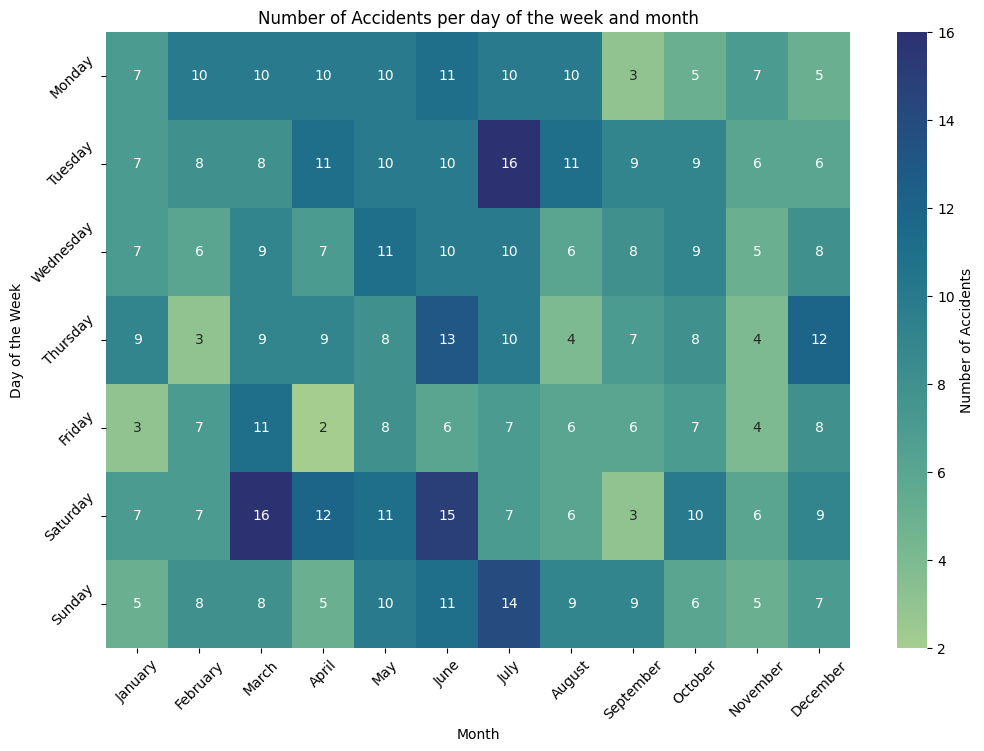

In [160]:
#creamos el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, annot=True, cmap='crest', cbar_kws={'label': 'Number of Accidents'})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Number of Accidents per day of the week and month')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()

Las combinaciones más frecuentes entre día y mes es Martes y Julio, y también Marzo y Sábado. Cada una de estas combinaciones presentan 16 accidentes. Otras combinaciones muy comunes son Junio y Sábado, o Julio y Domingo.

En cambio, combinaciones como Abril y Viernes o Septiembre y Sábado no presentan apenas incidentes.

Hagamos también el conteo de fallecidos en cada día de la semana.


In [103]:
df[df['Passed_away'] == 'Yes'].groupby('Day').size().reset_index(name='Deaths').sort_values(by='Deaths', ascending=False)

,Day,Deaths
3,Sunday,6
0,Friday,5
4,Thursday,5
5,Tuesday,5
1,Monday,2
2,Saturday,2


Los datos de los fallecimientos, en cuanto a los días, no coinciden con los de los accidentados en general. El Domingo es el día con más fallecimientos, y el Sábado el de menos.

Esta vez sí se observa una cierta tendencia a la alza en algunos días del fin de semana, si bien es cierto que el Sábado es el día en el que hubo que lamentar menos fallecimientos.